<a href="https://colab.research.google.com/github/chhavi007-bit/Healthcare-Follw-Up/blob/main/AI_Powered_Healthcare_Risk_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import gspread

Loading and Reading Data

In [ ]:
from google.colab import auth
# Authenticate and authorize Google Sheets access
auth.authenticate_user()
from google.auth import default
creds, _ = default()


gc = gspread.authorize(creds)

# Replace 'Your spreadsheet name' with the actual name of your spreadsheet
# Replace 'Sheet1' with the name of the sheet you want to access
# Replace 'NewDataSet' with the correct name of your spreadsheet
worksheet = gc.open('gpt-4').worksheet('gpt-4')
 # Load data into a pandas DataFrame
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])
df.shape


(3377, 2)

In [ ]:
print(df)

                                                   data  \
0     This 60-year-old male was hospitalized due to ...   
1     A 39-year-old man was hospitalized due to an i...   
2     One week after a positive COVID-19 result this...   
3     This 69-year-old male was admitted to the ICU ...   
4     This 57-year-old male was admitted to the ICU ...   
...                                                 ...   
3372  A 50-year-old male presented with complaints o...   
3373  DC, a 51-year-old male, underwent complete res...   
3374  A 69-year-old female patient was diagnosed wit...   
3375  A 76-year-old Caucasian, non-smoking female su...   
3376  A 20-year-old female presented to the emergenc...   

                                           conversation  
0     Doctor: Good morning, how are you feeling toda...  
1     Doctor: Hello, how are you feeling today?\nPat...  
2     Doctor: Hello, how are you feeling today?\nPat...  
3     Doctor: Hello, how are you feeling today?\nPat...  
4

Sampling

In [ ]:
sample_df = df.sample(n=1000, random_state=42)
print(sample_df)

                                                   data  \
3263  A 68-year-old female presented with gradual on...   
144   This 7-year-old girl is the only child of non-...   
1231  Patient A presented as a mostly healthy 15-yea...   
3001  A 52-year-old female with breast cancer underw...   
1052  A 54-year-old, right-handed unemployed Morocca...   
...                                                 ...   
464   A 71-year-old woman with a history of a right ...   
1956  A 45-year-old Japanese woman with a swelling a...   
1061  A 55-year-old Caucasian male with past medical...   
2720  A 57-year-old Japanese man was referred to our...   
2881  A 51-year-old woman (gravida 3) was admitted t...   

                                           conversation  
3263  Doctor: Hello, how are you feeling today?\nPat...  
144   Doctor: Hi there, how are you feeling today?\n...  
1231  Doctor: Hello, Patient A. Thank you for coming...  
3001  Doctor: Hello, how are you feeling today?\nPat...  
1

clean data
- These characters can introduce noise and ambiguity to your data, and may not be relevant for your NLP task.

In [ ]:
import re
def clean_text(text):

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

sample_df['text_column'] = sample_df['data'] + ' ' + sample_df['conversation'
]
sample_df['text_column'] = sample_df['text_column'].apply(clean_text)
print(sample_df['text_column'])
sample_df['text_column'].describe()


3263    A 68yearold female presented with gradual onse...
144     This 7yearold girl is the only child of noncon...
1231    Patient A presented as a mostly healthy 15year...
3001    A 52yearold female with breast cancer underwen...
1052    A 54yearold righthanded unemployed Moroccan Be...
                              ...                        
464     A 71yearold woman with a history of a right hi...
1956    A 45yearold Japanese woman with a swelling and...
1061    A 55yearold Caucasian male with past medical h...
2720    A 57yearold Japanese man was referred to our h...
2881    A 51yearold woman gravida 3 was admitted to ou...
Name: text_column, Length: 1000, dtype: object


,text_column
count,1000
unique,1000
top,A 68yearold female presented with gradual onse...
freq,1


Text Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


sample_df['processed_text'] = sample_df['text_column'].apply(preprocess_text)


In [ ]:
print(sample_df['processed_text'])

3263    68yearold female presented gradual onset negat...
144     7yearold girl child nonconsanguineous parent b...
1231    patient presented mostly healthy 15yearold cau...
3001    52yearold female breast cancer underwent left ...
1052    54yearold righthanded unemployed moroccan berb...
                              ...                        
464     71yearold woman history right hip intracapsula...
1956    45yearold japanese woman swelling bone exposur...
1061    55yearold caucasian male past medical history ...
2720    57yearold japanese man referred hospital incre...
2881    51yearold woman gravida 3 admitted hospital du...
Name: processed_text, Length: 1000, dtype: object


Exploratory Data Analysis

In [ ]:
from collections import Counter
word_counts = Counter(" ".join(sample_df['processed_text']).split())
print(word_counts.most_common(100))

[('patient', 12282), ('doctor', 11445), ('yes', 2805), ('okay', 2745), ('see', 2378), ('right', 2372), ('showed', 2068), ('left', 1976), ('history', 1972), ('also', 1908), ('well', 1736), ('examination', 1705), ('symptom', 1665), ('blood', 1604), ('pain', 1603), ('thats', 1565), ('normal', 1530), ('revealed', 1508), ('need', 1484), ('treatment', 1443), ('feeling', 1370), ('test', 1323), ('im', 1316), ('day', 1306), ('good', 1271), ('medical', 1200), ('month', 1123), ('mass', 1090), ('mean', 1083), ('lesion', 1081), ('found', 1065), ('performed', 1059), ('year', 1058), ('thank', 1029), ('family', 1022), ('today', 999), ('ct', 962), ('level', 959), ('presented', 903), ('cell', 866), ('tell', 840), ('tumor', 827), ('correct', 821), ('time', 809), ('eye', 805), ('week', 795), ('hospital', 794), ('abdominal', 791), ('disease', 779), ('scan', 773), ('condition', 770), ('surgery', 767), ('2', 694), ('diagnosis', 685), ('chest', 684), ('lower', 676), ('due', 652), ('started', 652), ('fig', 651

In [ ]:
import re
def extract_age(text):
  match = re.search(r'(\d{1,3})\s*(?:years?|yrs?|y/o|yo|age|aged)', text, re.IGNORECASE)
  return int(match.group(1)) if match else None

sample_df['age'] = sample_df['processed_text'].apply(extract_age)
print(sample_df[['age', 'processed_text']].head(10))




       age                                     processed_text
3263  68.0  68yearold female presented gradual onset negat...
144    7.0  7yearold girl child nonconsanguineous parent b...
1231  15.0  patient presented mostly healthy 15yearold cau...
3001  52.0  52yearold female breast cancer underwent left ...
1052  54.0  54yearold righthanded unemployed moroccan berb...
3076  20.0  20 yearold woman presented 1month history dete...
410   51.0  51yearold woman presented fatigue nausea vomit...
2575   8.0  8yearold boy chronic encephalopathy secondary ...
315   41.0  41yearold ukrainian male body mass index bmi 3...
2147  56.0  56yearold woman presented lack defecation unde...


In [ ]:
def extract_gender(text):
    text = text.lower()
    if re.search(r'\b(male|man|boy|gentleman|he|him)\b', text):
        return 'Male'
    elif re.search(r'\b(female|woman|girl|lady|she|her)\b', text):
        return 'Female'
    return 'Unknown'

sample_df['gender'] = sample_df['processed_text'].apply(extract_gender)
print(sample_df[['gender', 'processed_text']].head(10))


      gender                                     processed_text
3263  Female  68yearold female presented gradual onset negat...
144   Female  7yearold girl child nonconsanguineous parent b...
1231  Female  patient presented mostly healthy 15yearold cau...
3001  Female  52yearold female breast cancer underwent left ...
1052  Female  54yearold righthanded unemployed moroccan berb...
3076  Female  20 yearold woman presented 1month history dete...
410   Female  51yearold woman presented fatigue nausea vomit...
2575    Male  8yearold boy chronic encephalopathy secondary ...
315     Male  41yearold ukrainian male body mass index bmi 3...
2147  Female  56yearold woman presented lack defecation unde...


In [ ]:
import re
import pandas as pd


# Define a regex pattern for common medical terms (expand this list)
medical_terms = [
    # Common diseases
    "diabetes", "hypertension", "stroke", "cancer", "asthma", "tuberculosis",
    "heart attack", "lung infection", "pneumonia", "arthritis", "osteoporosis",
    "kidney disease", "liver failure", "migraine", "epilepsy", "Alzheimer", "Parkinson",

    # Symptoms
    "fever", "cough", "sore throat", "chest pain", "shortness of breath",
    "dizziness", "fatigue", "nausea", "vomiting", "headache", "muscle pain",
    "skin rash", "irregular heartbeat", "vision loss", "weight loss", "obesity",

    # Treatments
    "aspirin", "insulin", "inhaler", "antibiotics", "chemotherapy", "radiation therapy",
    "physical therapy", "painkillers", "antidepressants", "antihistamines", "surgery",
    "dialysis", "vaccine", "blood transfusion",

    # Medical tests
    "MRI scan", "CT scan", "X-ray", "ECG", "blood test", "urine test", "biopsy",
    "endoscopy", "ultrasound", "PET scan", "colonoscopy",

    "asthma", "bronchitis", "COPD", "emphysema", "pneumonia",

    "lung infection", "pulmonary fibrosis", "cystic fibrosis", "tuberculosis", "lung cancer",
    "pulmonary embolism", "ARDS", "interstitial lung disease", "sarcoidosis",
    "pleurisy", "pulmonary hypertension", "pneumothorax", "dyspnea", "wheezing",
    "chronic cough", "respiratory failure", "sleep apnea", "obstructive sleep apnea",
    "central sleep apnea", "hyperventilation", "hypoxia", "asphyxia",
    "acute bronchitis", "chronic bronchitis", "RSV", "influenza", "Legionnaires' disease",
    "Hantavirus pulmonary syndrome", "COVID-19", "SARS", "MERS"

    "ARDS",
"COVID-19",
"Breathing exercises",
"Clinical notes",
"Cough",
"Deep breath",
"Deoxygenation",
"Diagnosis",
"Dyspnea",
"Infection",
"Lungs",
"Oxygen desaturation",
"Oxygen saturation",
"Physical therapy",
"Prone position",
"Pulmonary",
"Rehabilitation",
"Respiratory",
"Respiratory failure",
"Symptoms",
"Therapy",
"Treatment",
"Ventilation",
]

# Create a regex pattern
medical_pattern = r"\b(" + "|".join(medical_terms) + r")\b"

# Function to extract medical terms using regex
def extract_medical_terms(text):
    return re.findall(medical_pattern, text, re.IGNORECASE)

# Apply regex extraction to DataFrame
sample_df['extracted_medical_terms'] = sample_df['processed_text'].apply(extract_medical_terms)

# Print extracted terms
print(sample_df['processed_text'], sample_df['extracted_medical_terms'])


3263    68yearold female presented gradual onset negat...
144     7yearold girl child nonconsanguineous parent b...
1231    patient presented mostly healthy 15yearold cau...
3001    52yearold female breast cancer underwent left ...
1052    54yearold righthanded unemployed moroccan berb...
                              ...                        
464     71yearold woman history right hip intracapsula...
1956    45yearold japanese woman swelling bone exposur...
1061    55yearold caucasian male past medical history ...
2720    57yearold japanese man referred hospital incre...
2881    51yearold woman gravida 3 admitted hospital du...
Name: processed_text, Length: 1000, dtype: object 3263    [respiratory, infection, diagnosis, biopsy, re...
144     [respiratory, ultrasound, respiratory, ultraso...
1231                      [diagnosis, diagnosis, therapy]
3001    [cancer, cancer, chemotherapy, ct scan, ct sca...
1052    [diabetes, diagnosis, diagnosis, diagnosis, bi...
                      

In [ ]:
print(sample_df[['processed_text', 'age', 'gender','extracted_medical_terms']])



                                         processed_text   age  gender  \
3263  68yearold female presented gradual onset negat...  68.0  Female   
144   7yearold girl child nonconsanguineous parent b...   7.0  Female   
1231  patient presented mostly healthy 15yearold cau...  15.0  Female   
3001  52yearold female breast cancer underwent left ...  52.0  Female   
1052  54yearold righthanded unemployed moroccan berb...  54.0  Female   
...                                                 ...   ...     ...   
464   71yearold woman history right hip intracapsula...  71.0  Female   
1956  45yearold japanese woman swelling bone exposur...  45.0  Female   
1061  55yearold caucasian male past medical history ...  55.0    Male   
2720  57yearold japanese man referred hospital incre...  57.0    Male   
2881  51yearold woman gravida 3 admitted hospital du...  51.0  Female   

                                extracted_medical_terms  
3263  [respiratory, infection, diagnosis, biopsy, re...  
144   [

In [ ]:
sample_df['extracted_medical_terms_str'] = sample_df['extracted_medical_terms'].apply(' '.join)
(sample_df['extracted_medical_terms_str'].head(17))

,extracted_medical_terms_str
3263,respiratory infection diagnosis biopsy respira...
144,respiratory ultrasound respiratory ultrasound
1231,diagnosis diagnosis therapy
3001,cancer cancer chemotherapy ct scan ct scan ct ...
1052,diabetes diagnosis diagnosis diagnosis biopsy
3076,headache vomiting fever infection surgery bloo...
410,fatigue nausea vomiting therapy fatigue nausea...
2575,epilepsy therapy skin rash fever respiratory f...
315,headache obesity treatment headache treatment ...
2147,colonoscopy cancer colonoscopy diagnosis surge...


In [ ]:
categories = {
    "diseases": [
        "diabetes", "hypertension", "stroke", "cancer", "asthma", "tuberculosis",
        "heart attack", "lung infection", "pneumonia", "arthritis", "osteoporosis",
        "kidney disease", "liver failure", "migraine", "epilepsy", "Alzheimer", "Parkinson",
        "bronchitis", "COPD", "emphysema", "pulmonary fibrosis", "cystic fibrosis",
        "pulmonary embolism", "ARDS", "interstitial lung disease", "sarcoidosis",
        "pleurisy", "pulmonary hypertension", "pneumothorax", "respiratory failure",
        "RSV", "influenza", "Legionnaires' disease", "Hantavirus pulmonary syndrome",
        "COVID-19", "SARS", "MERS"
    ],

    "symptoms": [
        "fever", "cough", "sore throat", "chest pain", "shortness of breath",
        "dizziness", "fatigue", "nausea", "vomiting", "headache", "muscle pain",
        "skin rash", "irregular heartbeat", "vision loss", "weight loss", "obesity",
        "dyspnea", "wheezing", "chronic cough", "sleep apnea", "obstructive sleep apnea",
        "central sleep apnea", "hyperventilation", "hypoxia", "asphyxia",
        "oxygen desaturation", "oxygen saturation", "deoxygenation"
    ],

    "treatments": [
        "aspirin", "insulin", "inhaler", "antibiotics", "chemotherapy", "radiation therapy",
        "physical therapy", "painkillers", "antidepressants", "antihistamines", "surgery",
        "dialysis", "vaccine", "blood transfusion", "breathing exercises", "rehabilitation",
        "therapy", "ventilation", "prone position", "treatment"
    ],

    "medical_tests": [
        "MRI scan", "CT scan", "X-ray", "ECG", "blood test", "urine test", "biopsy",
        "endoscopy", "ultrasound", "PET scan", "colonoscopy"
    ],

    "general_medical_terms": [
        "infection", "lungs", "pulmonary", "respiratory", "clinical notes", "diagnosis",
        "symptoms"
    ]
}

# Print categorized terms
for category, terms in categories.items():
    print(f"\n{category.upper()} ({len(terms)} terms):")
    print(", ".join(terms))





DISEASES (37 terms):
diabetes, hypertension, stroke, cancer, asthma, tuberculosis, heart attack, lung infection, pneumonia, arthritis, osteoporosis, kidney disease, liver failure, migraine, epilepsy, Alzheimer, Parkinson, bronchitis, COPD, emphysema, pulmonary fibrosis, cystic fibrosis, pulmonary embolism, ARDS, interstitial lung disease, sarcoidosis, pleurisy, pulmonary hypertension, pneumothorax, respiratory failure, RSV, influenza, Legionnaires' disease, Hantavirus pulmonary syndrome, COVID-19, SARS, MERS

SYMPTOMS (28 terms):
fever, cough, sore throat, chest pain, shortness of breath, dizziness, fatigue, nausea, vomiting, headache, muscle pain, skin rash, irregular heartbeat, vision loss, weight loss, obesity, dyspnea, wheezing, chronic cough, sleep apnea, obstructive sleep apnea, central sleep apnea, hyperventilation, hypoxia, asphyxia, oxygen desaturation, oxygen saturation, deoxygenation

TREATMENTS (20 terms):
aspirin, insulin, inhaler, antibiotics, chemotherapy, radiation the

In [ ]:
# Create regex patterns for each category
patterns = {category: r"\b(" + "|".join(terms) + r")\b" for category, terms in categories.items()}


def classify_medical_terms(text):
    extracted = {"diseases": [], "symptoms": [], "treatments": [], "medical_tests": []}
    for category, pattern in patterns.items():
        extracted[category] = re.findall(pattern, text, re.IGNORECASE)
    return extracted


# Apply classification function
sample_df['classified_medical_terms'] = sample_df['extracted_medical_terms_str'].apply(classify_medical_terms)

# Print results
print(sample_df[['classified_medical_terms']].head(10))


                               classified_medical_terms
3263  {'diseases': [], 'symptoms': [], 'treatments':...
144   {'diseases': [], 'symptoms': [], 'treatments':...
1231  {'diseases': [], 'symptoms': [], 'treatments':...
3001  {'diseases': ['cancer', 'cancer', 'cancer', 'c...
1052  {'diseases': ['diabetes'], 'symptoms': [], 'tr...
3076  {'diseases': [], 'symptoms': ['headache', 'vom...
410   {'diseases': [], 'symptoms': ['fatigue', 'naus...
2575  {'diseases': ['epilepsy', 'respiratory failure...
315   {'diseases': [], 'symptoms': ['headache', 'obe...
2147  {'diseases': ['cancer', 'cancer'], 'symptoms':...


Accuracy: 0.42566510172143973
                        precision    recall  f1-score   support

                  ards       0.63      1.00      0.78        31
             arthritis       0.50      0.03      0.06        31
                asthma       0.12      0.05      0.07        21
            bronchitis       0.82      0.78      0.80        23
                cancer       0.00      0.00      0.00        28
                  copd       0.59      1.00      0.75        19
              diabetes       1.00      0.04      0.07        28
             emphysema       0.82      0.56      0.67        25
              epilepsy       0.69      0.47      0.56        19
          heart attack       0.56      1.00      0.71        20
          hypertension       0.00      0.00      0.00        16
             influenza       0.22      0.57      0.32        21
        kidney disease       0.24      0.21      0.22        19
         liver failure       0.85      1.00      0.92        22
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-17-78cc50b17296>:65: FutureWarning

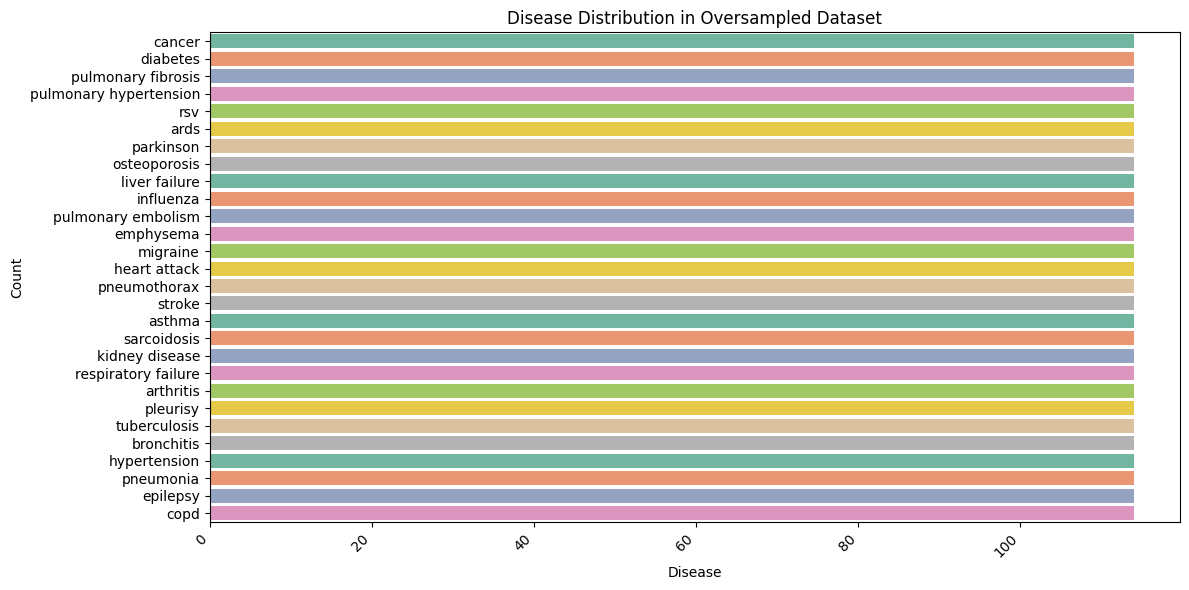

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Ensure 'sample_df' exists
if 'sample_df' not in locals():
    raise ValueError("Dataset 'sample_df' is not defined!")

# Remove 'Unknown' diseases
filtered_df = sample_df[sample_df['classified_medical_terms'].apply(lambda x: x['diseases'][0] if x['diseases'] else None).notna()]

# Randomly sample up to 1000 records (optional)
sampled_df = filtered_df.sample(n=1000, random_state=42) if len(filtered_df) > 1000 else filtered_df

# Prepare Text Features (TF-IDF)
vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
    ngram_range=(1,2),
    stop_words='english'
)
X = vectorizer.fit_transform(sampled_df['classified_medical_terms'].apply(lambda x: ' '.join(x['symptoms'])))
y = sampled_df['classified_medical_terms'].apply(lambda x: x['diseases'][0])

# Apply Random Over-Sampling to Balance Classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Function for Predicting Diseases
def predict_disease(symptoms):
    cleaned_symptoms = " ".join(symptoms.split(", "))  # Simple text cleaning
    vectorized_input = vectorizer.transform([cleaned_symptoms])
    prediction = model.predict(vectorized_input)
    return prediction[0]

# Example Prediction
new_symptoms = "fever, cold, fatigue"
predicted_disease = predict_disease(new_symptoms)
print("Predicted Disease:", predicted_disease)

# Symptom Binarization for Visualization
mlb_symptoms = MultiLabelBinarizer()
X_binarized = mlb_symptoms.fit_transform(sampled_df['classified_medical_terms'].apply(lambda x: x['symptoms']))

# Visualization: Disease Counts After Oversampling
plt.figure(figsize=(12, 6))
sns.countplot(y=y_resampled, order=y_resampled.value_counts().index, palette='Set2')
plt.title('Disease Distribution in Oversampled Dataset')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, "predict_disease.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

age:**bold text**

In [ ]:
def determine_high_risk(row):

    severe_symptoms = [
        "shortness of breath", "chest pain", "irregular heartbeat",
        "Loss of consciousness", "Seizures", "Sudden confusion",
        "Severe headache", "High fever", "Uncontrolled bleeding",
        "Severe allergic reaction", "Persistent vomiting", "Severe abdominal pain",
        "Weakness or numbness", "Rapid or irregular heartbeat", "Severe burns",
        "Inability to urinate", "Bluish lips or nails", "Severe back pain",
        "Mental status changes", "Persistent dizziness", "Extreme fatigue","dyspnea"
        "wheezing", "chronic cough", "sleep apnea", "obstructive sleep apnea",
        "central sleep apnea", "hyperventilation", "hypoxia", "asphyxia",
        "oxygen desaturation", "oxygen saturation", "deoxygenation",
        "sore throat", "dizziness", "fatigue", "nausea", "vomiting", "headache", "muscle pain",
        "skin rash", "irregular heartbeat", "vision loss", "weight loss", "obesity"
    ]

    # Ensure keys exist before accessing them
    symptoms = row.get('classified_medical_terms', {}).get('symptoms', [])
    age = row.get('age', None)


    # Check if the person has multiple severe symptoms
    if sum(symptom in symptoms for symptom in severe_symptoms) >= 2:
        return 1

    # Check if age is above 65 (elderly risk factor)
    if age is not None and age >= 65:
        return 1

    return 0

# Apply function to DataFrame
sample_df['high_risk'] = sample_df.apply(determine_high_risk, axis=1)

# Print high-risk cases
print(sample_df[['processed_text', 'age', 'classified_medical_terms', 'high_risk']].head(25))


                                         processed_text   age  \
3263  68yearold female presented gradual onset negat...  68.0   
144   7yearold girl child nonconsanguineous parent b...   7.0   
1231  patient presented mostly healthy 15yearold cau...  15.0   
3001  52yearold female breast cancer underwent left ...  52.0   
1052  54yearold righthanded unemployed moroccan berb...  54.0   
3076  20 yearold woman presented 1month history dete...  20.0   
410   51yearold woman presented fatigue nausea vomit...  51.0   
2575  8yearold boy chronic encephalopathy secondary ...   8.0   
315   41yearold ukrainian male body mass index bmi 3...  41.0   
2147  56yearold woman presented lack defecation unde...  56.0   
1962  71yearold japanese woman admitted toranomon ho...  71.0   
1788  index patient 27yearold chinese han female non...  27.0   
3179  13yearold child learning disability referred o...  13.0   
2372  57yearold japanese woman presented 15year hist...  57.0   
1514  45yearold woman pre

In [ ]:
# Create a new column called symptoms
sample_df['symptoms'] = sample_df['classified_medical_terms'].apply(lambda x: x['symptoms'])
print(sample_df[['processed_text', 'age', 'symptoms', 'high_risk']].head(25))

                                         processed_text   age  \
3263  68yearold female presented gradual onset negat...  68.0   
144   7yearold girl child nonconsanguineous parent b...   7.0   
1231  patient presented mostly healthy 15yearold cau...  15.0   
3001  52yearold female breast cancer underwent left ...  52.0   
1052  54yearold righthanded unemployed moroccan berb...  54.0   
3076  20 yearold woman presented 1month history dete...  20.0   
410   51yearold woman presented fatigue nausea vomit...  51.0   
2575  8yearold boy chronic encephalopathy secondary ...   8.0   
315   41yearold ukrainian male body mass index bmi 3...  41.0   
2147  56yearold woman presented lack defecation unde...  56.0   
1962  71yearold japanese woman admitted toranomon ho...  71.0   
1788  index patient 27yearold chinese han female non...  27.0   
3179  13yearold child learning disability referred o...  13.0   
2372  57yearold japanese woman presented 15year hist...  57.0   
1514  45yearold woman pre

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Prepare features (X) and target (y)
X = mlb_symptoms.fit_transform(sample_df['classified_medical_terms'].apply(lambda x: x['symptoms']))
y = sample_df['high_risk']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on Test Set
y_pred = rf_model.predict(X_test)

# Evaluate Model
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7900
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       135
           1       0.83      0.45      0.58        65

    accuracy                           0.79       200
   macro avg       0.81      0.70      0.72       200
weighted avg       0.80      0.79      0.77       200



In [ ]:
# Save the model and the MultiLabelBinarizer
joblib.dump(rf_model, 'determine_high_risk.pkl')
joblib.dump(mlb_symptoms, 'mlb_symptoms.pkl')

# Print sample high-risk predictions
print(sample_df[['age', 'classified_medical_terms', 'high_risk']])

       age                           classified_medical_terms  high_risk
3263  68.0  {'diseases': [], 'symptoms': [], 'treatments':...          1
144    7.0  {'diseases': [], 'symptoms': [], 'treatments':...          0
1231  15.0  {'diseases': [], 'symptoms': [], 'treatments':...          0
3001  52.0  {'diseases': ['cancer', 'cancer', 'cancer', 'c...          0
1052  54.0  {'diseases': ['diabetes'], 'symptoms': [], 'tr...          0
...    ...                                                ...        ...
464   71.0  {'diseases': ['hypertension', 'cancer'], 'symp...          1
1956  45.0  {'diseases': [], 'symptoms': [], 'treatments':...          0
1061  55.0  {'diseases': [], 'symptoms': ['nausea', 'vomit...          1
2720  57.0  {'diseases': [], 'symptoms': [], 'treatments':...          0
2881  51.0  {'diseases': [], 'symptoms': [], 'treatments':...          0

[1000 rows x 3 columns]


In [ ]:
print(sample_df['high_risk'].value_counts())  # Count High vs. Low Risk cases


high_risk
0    677
1    323
Name: count, dtype: int64


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
!pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.27.0, but you have google-auth 2.38.0 which is incompatible.


In [ ]:
%%writefile app.py
# Paste the above Streamlit code here
import joblib
import streamlit as st
import plotly.express as px
import pandas as pd
import urllib.parse
import base64
from google.oauth2.credentials import Credentials
from googleapiclient.discovery import build
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Load Models and Multi-Label Binarizer
rf_model = joblib.load("determine_high_risk.pkl")
mlb_symptoms = joblib.load("mlb_symptoms.pkl")
disease_model = joblib.load("predict_disease.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
HOSPITAL_EMAIL = "chhaviel04@gmail.com"

CLIENT_ID = "************************************"
CLIENT_SECRET = "********************************"
REFRESH_TOKEN = "*****************************************"
YOUR_GMAIL = "chhavichadha07@gmail.com"

# ✅ Gmail API Authentication
def authenticate_gmail():
    creds = Credentials(
        None,
        refresh_token=REFRESH_TOKEN,
        token_uri="https://oauth2.googleapis.com/token",
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
    )
    return build("gmail", "v1", credentials=creds)

# ✅ Function to Send High-Risk Alert Email
def send_high_risk_email(patient_id, name, number, age, gender, symptoms, risk_level):
    service = authenticate_gmail()

    subject = "🚨 Emergency Alert: High-Risk Patient"
    body = f"""
    ⚠️ High-Risk Patient Report ⚠️

    Patient ID: {patient_id}
    Name: {name}
    Mobile: {number}
    Age: {age}
    Gender: {gender}
    Symptoms: {', '.join(symptoms)}
    Risk Level: {risk_level}

    Please take necessary action.
    """

    msg = MIMEMultipart()
    msg["From"] = YOUR_GMAIL
    msg["To"] = YOUR_GMAIL  # Change if sending to a doctor/hospital email
    msg["Subject"] = subject
    msg.attach(MIMEText(body, "plain"))

    raw_message = base64.urlsafe_b64encode(msg.as_bytes()).decode("utf-8")
    message = {"raw": raw_message}

    try:
        service.users().messages().send(userId="me", body=message).execute()
        print(f"✅ Email sent successfully to {YOUR_GMAIL}")
    except Exception as e:
        print(f"❌ Failed to send email: {e}")


# High-risk assessment function
import numpy as np
import pandas as pd

def determine_high_risk(symptoms, age):
    try:
        # Ensure symptoms are a list
        if not isinstance(symptoms, list):
            symptoms = [symptoms]

        # Convert symptoms into binary format using the trained mlb_symptoms
        symptoms_vectorized = mlb_symptoms.transform([symptoms])

        # Convert to dense array if necessary
        if hasattr(symptoms_vectorized, 'toarray'):
            symptoms_vectorized = symptoms_vectorized.toarray()

        # Make a prediction with the trained RandomForest model
        prediction = rf_model.predict(symptoms_vectorized)

        # Return high or low risk based on the model's prediction
        return "High Risk" if prediction[0] == 1 else "Low Risk"

    except Exception as e:
        print(f"Error in determine_high_risk: {e}")
        raise e






# Initialize Session State for Patient Reports
if 'patient_reports' not in st.session_state:
    st.session_state.patient_reports = []

# Set Background Image for Homepage
def set_bg_image():
    st.markdown(
        """
        <style>
        .stApp {
            background-image: url("/content/Untitled design (7).png");
            background-size: 200px;
        }
        </style>
        """,
        unsafe_allow_html=True
    )



def predict_disease(symptoms_string):
    try:
        # Ensure input is a clean, properly formatted string
        symptoms_list = [s.strip() for s in symptoms_string.split(',') if s.strip()]

        if not symptoms_list:
            return "Unknown Disease"  # Handle empty input safely

        # Convert symptoms into a single string (expected format for vectorizer)
        symptoms_transformed = vectorizer.transform([" ".join(symptoms_list)])

        # Convert sparse matrix to dense array if necessary
        if hasattr(symptoms_transformed, 'toarray'):
            symptoms_transformed = symptoms_transformed.toarray()

        # Make prediction using trained model
        prediction = model.predict(symptoms_transformed)

        # Ensure prediction is extracted properly
        if isinstance(prediction, (list, np.ndarray)):
            predicted_disease = prediction[0]  # Extract first element
        else:
            predicted_disease = prediction

        return predicted_disease

    except Exception as e:
        print(f"Error in predict_disease: {e}")  # Debugging error messages
        import traceback
        traceback.print_exc()
        return "Unknown Disease"


# Homepage
def homepage():
    set_bg_image()
    st.title("🏥 Welcome to Mediboard")
    st.write("This platform allows patients to securely submit their health details and symptoms for risk assessment by medical professionals.")

# Visualization Board
def visualization_board():
    st.title("📊 Health Analysis Dashboard")
    if len(st.session_state.patient_reports) == 0:
        st.warning("No patient data available for analysis.")
        return

    df = pd.DataFrame(st.session_state.patient_reports, columns=["Patient ID", "Name", "Mobile.no", "Age", "Gender", "Symptoms", "Risk Level"])

    symptom_counts = df["Symptoms"].explode().value_counts()
    fig1 = px.bar(symptom_counts, x=symptom_counts.index, y=symptom_counts.values, title="Most Common Symptoms")

    risk_counts = df["Risk Level"].value_counts()
    fig2 = px.pie(names=risk_counts.index, values=risk_counts.values, title="Risk Level Distribution")

    fig3 = px.box(df, x="Risk Level", y="Age", title="Age Distribution by Risk levels")



    st.plotly_chart(fig1)
    st.plotly_chart(fig2)
    st.plotly_chart(fig3)


# Patient Dashboard
def patient_dashboard():
    st.title("🩺 Patient Information")
    name = st.text_input("Enter Patient Name")
    number = st.text_input("Enter Mobile.no")
    age = st.number_input("Enter Age", min_value=0, max_value=120, step=1)
    gender = st.selectbox("Enter Gender", ["M", "F", "Other"])
    symptoms = st.text_area("Enter Symptoms (comma-separated)")

    if st.button("Submit"):
      if symptoms:
        symptoms_list = [s.strip() for s in symptoms.split(',')]

        # Use the trained model for risk assessment
        high_risk = determine_high_risk(symptoms_list, age)

        patient_id = len(st.session_state.patient_reports) + 1
        st.session_state.patient_reports.append([patient_id, name, number, age, gender, symptoms_list, high_risk])

        st.write("### Patient Summary")
        st.write(f"**Patient ID:** {patient_id}")
        st.write(f"**Name:** {name}")
        st.write(f"**Mobile.no:** {number}")
        st.write(f"**Age:** {age}")
        st.write(f"**Gender:** {gender}")
        st.write(f"**Symptoms:** {', '.join(symptoms_list)}")
        st.write(f"**Risk Level:** {high_risk}")

        if high_risk == "High Risk":
          email_subject = "!!Emergency Alert: High-Risk Patient"
          email_body = f"""
                SEND YOUR REPORT TO MEDICARE.\n
                FROM:{name}\n
                Patient ID: {patient_id}\n
                Name: {name}\n
                Mobile.no: {number}\n
                Age: {age}\n
                Gender: {gender}\n
                Symptoms: {', '.join(symptoms_list)}\n
                Risk Level: {high_risk}\n
                Please take
                necessary action.
                """
          st.error("!! We had sent your report to doctor for evaluation !!.")
          send_high_risk_email(patient_id, name, number, age, gender, symptoms_list, high_risk)
          st.success("🚨 Email sent to the hospital for review, We will get in touch with you soon! ")



# Doctor Dashboard
def doctor_dashboard():
    st.title("👨‍⚕️ Doctor Dashboard")
    if len(st.session_state.patient_reports) == 0:
        st.warning("No patient reports available.")
        return
    df = pd.DataFrame(st.session_state.patient_reports, columns=["Patient ID", "Name", "Mobile.no", "Age", "Gender", "Symptoms", "Risk Level"])
    st.dataframe(df)

# Sidebar Navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Home", "Healthcare Analytics Panel", "Health Assessment Portal", "Clinical Insights Hub"])
if page == "Home":
    homepage()
elif page == "Healthcare Analytics Panel":
    visualization_board()
elif page == "Health Assessment Portal":
    patient_dashboard()
elif page == "Clinical Insights Hub":
    doctor_dashboard()



Writing app.py


In [ ]:
!streamlit run app.py & npx cloudflared tunnel --url http://localhost:8501




⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.152.118:8501

⠇2025-02-08T13:19:39Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-02-08T13:19:39Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-02-08T13:19:42Z INF +--------------------------------------------------------------------------------------------+
2025-02-08T13:19